## Income prediction with Random Forests

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [40]:
income_data = pd.read_csv('income.csv', header=0, delimiter=", ")
income_data.columns

/home/anon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [41]:
income_data['sex-int'] = income_data['sex'].apply(lambda row: 0 if row=='Male' else 1)

In [42]:
income_data['country-int'] = income_data['native-country'].apply(lambda row: 0 if row=='United-States' else 1)

In [43]:
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,sex-int,country-int
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,1


In [44]:
labels = income_data[['income']]

In [46]:
data = income_data[['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex-int', 'country-int']]
data.head()

,age,capital-gain,capital-loss,hours-per-week,sex-int,country-int
0,39,2174,0,40,0,0
1,50,0,0,13,0,0
2,38,0,0,40,0,0
3,53,0,0,40,0,0
4,28,0,0,40,1,1


In [47]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

In [48]:
forest = RandomForestClassifier(random_state=1)

In [49]:
forest.fit(train_data, train_labels)

/home/anon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [50]:
forest.score(test_data, test_labels)

0.823731728288908

In [36]:
income_data['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [55]:
forest.feature_importances_

array([0.32211239, 0.29058066, 0.11846813, 0.20041288, 0.05870889,
       0.00971705])

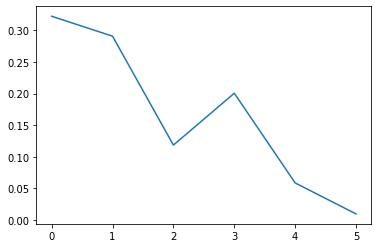

In [64]:
plt.plot(range(len(forest.feature_importances_)), forest.feature_importances_)
plt.show()